**Nama : Bintang Padma Meiharjo**

**NIM : 4112322025**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/semester 6/machine learning/loan_approval_dataset.csv')
df.info(), df.head()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              500 non-null    int64 
 1   Income           500 non-null    int64 
 2   Education_Level  500 non-null    object
 3   Credit_Score     500 non-null    int64 
 4   Loan_Amount      500 non-null    int64 
 5   Loan_Purpose     500 non-null    object
 6   Loan_Approval    500 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 27.5+ KB


(None,
    Age  Income Education_Level  Credit_Score  Loan_Amount Loan_Purpose  \
 0   56   24000             PhD           333        26892     Personal   
 1   46   90588          Master           316        26619         Home   
 2   32  113610             PhD           452         1281     Personal   
 3   60  117856     High School           677        28420     Personal   
 4   25   58304             PhD           641        16360          Car   
 
    Loan_Approval  
 0              0  
 1              1  
 2              1  
 3              0  
 4              0  )

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Kode diatas bertujuan untuk membangun dan mengevaluasi model machine learning untuk memprediksi persetujuan pinjaman. Dengan menggunakan dua model yang berbeda dan melakukan optimasi, diharapkan dapat ditemukan model yang paling akurat dalam memprediksi persetujuan pinjaman. Visualisasi seperti confusion matrix dan heatmap membantu dalam memahami kinerja model dan membandingkan hasil dari model yang berbeda.

**Nomor 1 eksplorasi data**

<ipython-input-5-c9e7ef38651d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Approval', data=df, palette='coolwarm')


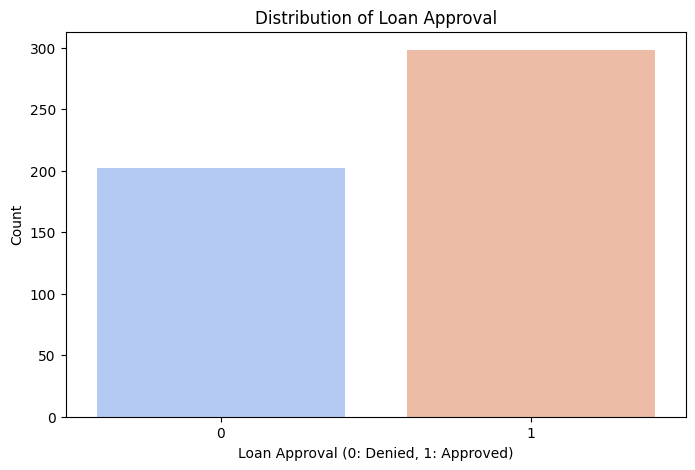

In [5]:
# Data Visualization

plt.figure(figsize=(8, 5))
sns.countplot(x='Loan_Approval', data=df, palette='coolwarm')
plt.title('Distribution of Loan Approval')
plt.xlabel('Loan Approval (0: Denied, 1: Approved)')
plt.ylabel('Count')
plt.show()

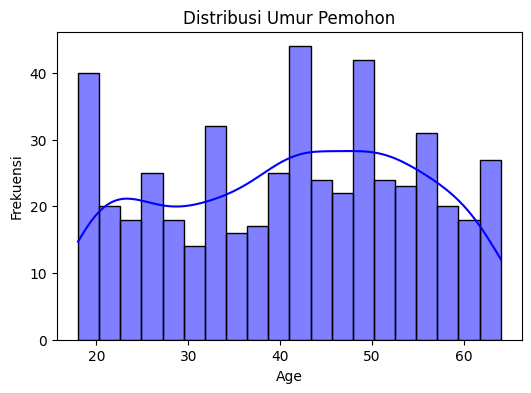

In [6]:
# Distribusi Umur Pemohon
plt.figure(figsize=(6, 4))
sns.histplot(df["Age"], bins=20, kde=True, color="blue")
plt.title("Distribusi Umur Pemohon")
plt.xlabel("Age")
plt.ylabel("Frekuensi")
plt.show()

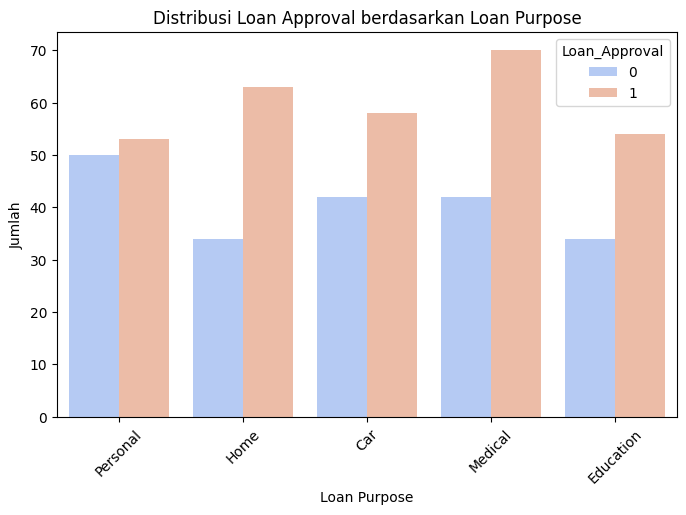

In [7]:
# Distribusi Loan Approval berdasarkan Loan Purpose
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Loan_Purpose"], hue=df["Loan_Approval"], palette="coolwarm")
plt.title("Distribusi Loan Approval berdasarkan Loan Purpose")
plt.xlabel("Loan Purpose")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

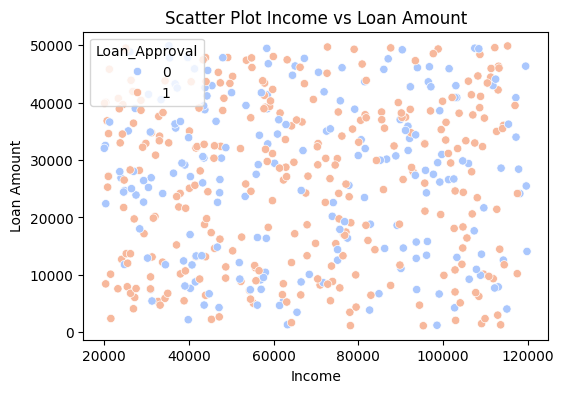

In [8]:
# Scatter plot antara Income dan Loan Amount
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["Income"], y=df["Loan_Amount"], hue=df["Loan_Approval"], palette="coolwarm")
plt.title("Scatter Plot Income vs Loan Amount")
plt.xlabel("Income")
plt.ylabel("Loan Amount")
plt.show()

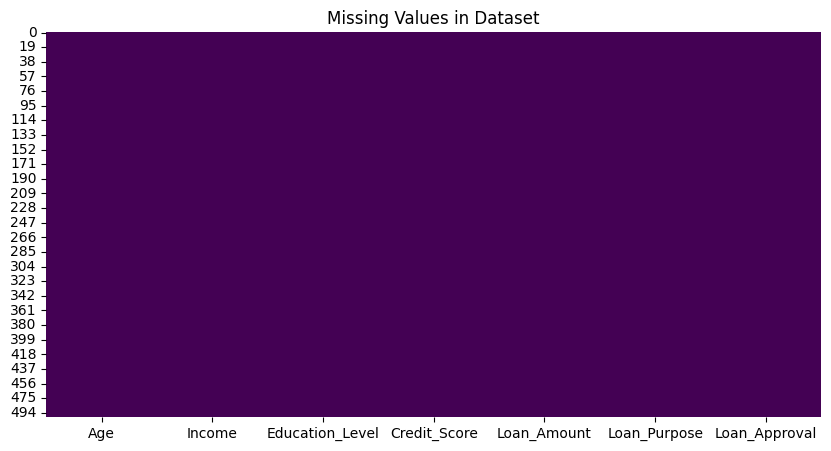

In [9]:
# Kode missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()

Kode ini akan menghasilkan heatmap di mana setiap sel mewakili nilai dalam dataset.

Sel berwarna (sesuai dengan peta warna 'viridis') menunjukkan adanya nilai yang hilang pada lokasi yang sesuai dalam dataset.

Sel yang tidak berwarna menunjukkan bahwa nilai tersebut ada.
Visualisasi ini membantu dalam mengidentifikasi pola atau area dalam dataset di mana data yang hilang terkonsentrasi.

**Nomor 2 Pemrosesan data**

In [10]:
# kategori
label_enc = LabelEncoder()
df['Education_Level'] = label_enc.fit_transform(df['Education_Level'])
df['Loan_Purpose'] = label_enc.fit_transform(df['Loan_Purpose'])

In [11]:
# numerik
scaler = StandardScaler()
num_features = ['Age', 'Income', 'Credit_Score', 'Loan_Amount']
df[num_features] = scaler.fit_transform(df[num_features])

In [12]:
# Bagi dataset menjadi training set (80%) dan testing set (20%)
X = df.drop(columns=["Loan_Approval"])
y = df["Loan_Approval"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

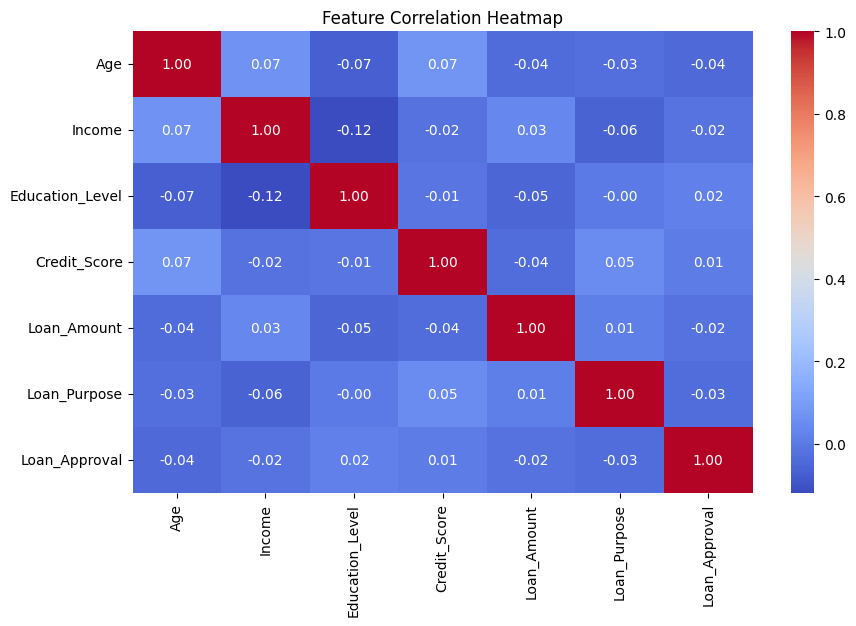

In [13]:
# korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

**Nomor 3 Pemilihan dan Training Model**

In [14]:
# Dua algoritma Machine Learning yang berbeda
X = df.drop(columns=['Loan_Approval'])
y = df['Loan_Approval']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

In [16]:
# melatih model
rf_model.fit(X_train, y_train)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [17]:
# Prediksi
y_pred_rf = rf_model.predict(X_test)
y_pred_logreg = logreg_model.predict(X_test)

**Nmor 4 Evaluasi Model**

In [18]:
# Evaluasi model
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }

rf_metrics = evaluate_model(y_test, y_pred_rf)
logreg_metrics = evaluate_model(y_test, y_pred_logreg)
print("Random Forest Metrics:", rf_metrics)
print("Logistic Regression Metrics:", logreg_metrics)

Random Forest Metrics: {'Accuracy': 0.57, 'Precision': 0.6024096385542169, 'Recall': 0.8333333333333334, 'F1-score': 0.6993006993006993}
Logistic Regression Metrics: {'Accuracy': 0.58, 'Precision': 0.59375, 'Recall': 0.95, 'F1-score': 0.7307692307692307}


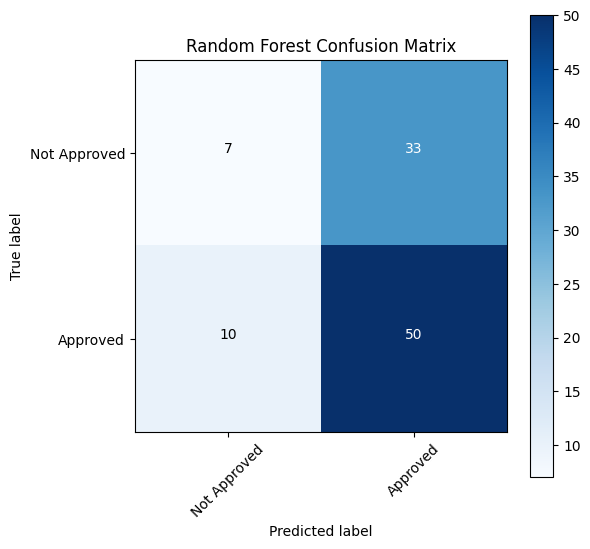

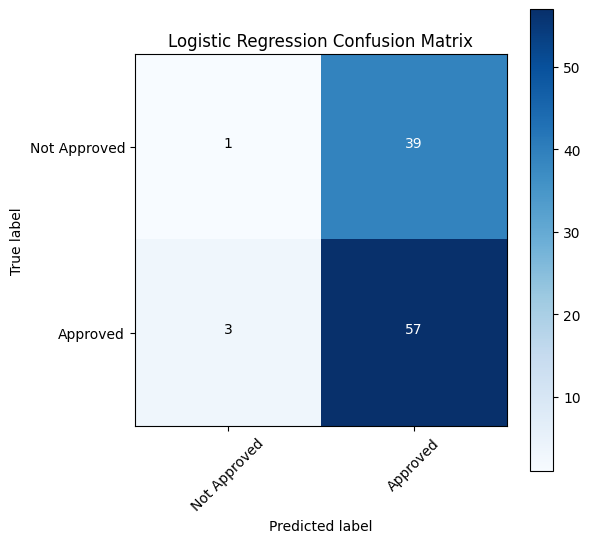

In [19]:
# Matriks
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

plot_confusion_matrix(cm_rf, classes=['Not Approved', 'Approved'], title='Random Forest Confusion Matrix')
plot_confusion_matrix(cm_logreg, classes=['Not Approved', 'Approved'], title='Logistic Regression Confusion Matrix')

Kode ini berfokus pada pembangunan, evaluasi, dan optimasi model machine learning untuk prediksi persetujuan pinjaman.

Kode ini memberikan alur kerja lengkap untuk membangun dan mengevaluasi model machine learning untuk prediksi persetujuan pinjaman. Dengan menggunakan visualisasi, preprocessing data, pemilihan model yang tepat, evaluasi menyeluruh, dan tuning hyperparameter, diharapkan dapat ditemukan model yang paling akurat dalam memprediksi persetujuan pinjaman.

**Nomor 5 Tuning Model dengan Grid Search atau Random Search**

**Nomor 6 Perbandingan Performa Sebelum dan Sesudah Tuning**

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Parameters for Logistic Regression: {'C': 0.01, 'solver': 'lbfgs'}
Optimized Random Forest Metrics: {'Accuracy': 0.57, 'Precision': 0.6024096385542169, 'Recall': 0.8333333333333334, 'F1-score': 0.6993006993006993}
Optimized Logistic Regression Metrics: {'Accuracy': 0.6, 'Precision': 0.6, 'Recall': 1.0, 'F1-score': 0.75}


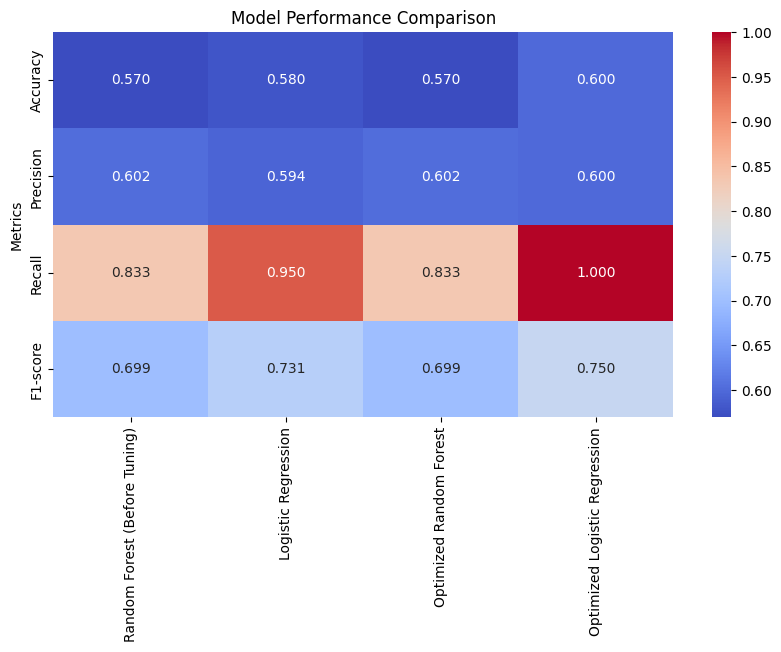

In [20]:
# Hyperparameter Tuning
## Mendefinisikan kisi-kisi parameter
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Grid search untuk parameter terbaik
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
logreg_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid_logreg, cv=5, scoring='f1', n_jobs=-1)

rf_grid.fit(X_train, y_train)
logreg_grid.fit(X_train, y_train)

# parameter terbaik
best_params_rf = rf_grid.best_params_
best_params_logreg = logreg_grid.best_params_ # mengubah rf_grid menjadi logreg_grid
print("Best Parameters for Random Forest:", best_params_rf)
print("Best Parameters for Logistic Regression:", best_params_logreg)

# Melatih model terbaik dengan hyperparameter yang dioptimalkan"
rf_best = RandomForestClassifier(**best_params_rf, random_state=42)
rf_best.fit(X_train, y_train)
y_pred_rf_best = rf_best.predict(X_test) #  mengubah variabel dari rf_best_model menjadi rf_best

logreg_best_model = LogisticRegression(**best_params_logreg, max_iter=1000, random_state=42)
logreg_best_model.fit(X_train, y_train)
y_pred_logreg_best = logreg_best_model.predict(X_test)

# Evaluasi model yang dioptimalkan
rf_best_metrics = evaluate_model(y_test, y_pred_rf)
logreg_best_metrics = evaluate_model(y_test, y_pred_logreg_best)
print("Optimized Random Forest Metrics:", rf_best_metrics)
print("Optimized Logistic Regression Metrics:", logreg_best_metrics)

# Compare Performance sebelum dan sesudah Tuning
metrics_df = pd.DataFrame([rf_metrics, logreg_metrics, rf_best_metrics, logreg_best_metrics],
                          index=["Random Forest (Before Tuning)", "Logistic Regression", "Optimized Random Forest", "Optimized Logistic Regression"])

# menampilkan
plt.figure(figsize=(10, 5))
sns.heatmap(metrics_df.T, annot=True, cmap="coolwarm", fmt='.3f')
plt.title("Model Performance Comparison")
plt.ylabel("Metrics")
plt.show()

Kode ini bertujuan untuk meningkatkan performa model RandomForestClassifier dan LogisticRegression dengan cara mencari dan menggunakan parameter terbaik atau yang sering disebut hyperparameter tuning.

Hasil yang didapat:

Parameter Terbaik: untuk mendapatkan nilai parameter terbaik dari RandomForestClassifier dan LogisticRegression berdasarkan pencarian grid search.

Perbandingan Performa: Heatmap akan menunjukkan perbandingan metrik (Akurasi, Presisi, Recall, F1-score) untuk model sebelum dan sesudah tuning.

Kesimpulan
Optimized Logistic Regression adalah model dengan performa terbaik, karena memiliki nilai akurasi, recall, dan F1-score tertinggi.
Logistic Regression tanpa optimasi juga cukup baik, dengan nilai recall yang tinggi.
Random Forest (baik sebelum maupun setelah tuning) memiliki performa lebih rendah dalam recall dan F1-score, sehingga kurang optimal dibanding Logistic Regression.
Jika tujuan utama adalah mengoptimalkan recall dan keseimbangan dengan precision (F1-score), Optimized Logistic Regression adalah pilihan terbaik.